<a href="https://colab.research.google.com/github/vrohra99/mtp/blob/main/Health_FD001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train_FD001.txt to train_FD001.txt


In [2]:
pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 129 kB 5.0 MB/s 


In [25]:
import pandas as pd
from hmmlearn.hmm import GMMHMM, GaussianHMM
from hmmlearn.base import BaseHMM
from sklearn.preprocessing import StandardScaler
import io

In [26]:
traindata = pd.read_csv(io.BytesIO(uploaded['train_FD001.txt']), sep= " ", header = None )
traindata.drop([26,27],inplace=True,axis=1)
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [27]:
engines=int(traindata.loc[traindata.shape[0]-1][0])
engines

100

In [28]:
hpc_kpi=[7,11,15]


In [29]:
hiddenstates=30

In [30]:
startprob=[0]*hiddenstates
startprob[0]=1
print(startprob)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [31]:
import numpy as np
transmat=np.identity(hiddenstates)
for i in range(0,hiddenstates-1):
    transmat[i][i]=0.5
    transmat[i][i+1]=0.5

In [32]:
health_state=[]

In [33]:
def iterate(i):
  try:
    hpc=traindata.loc[traindata[0]==i][hpc_kpi]
    hpc=StandardScaler().fit_transform(hpc)
    model = GMMHMM(n_components=30, covariance_type="diag", init_params="cm", params="cmt")
    model.transmat_=transmat
    model.startprob_=startprob
    model.fit(hpc)
    pred=model.decode(hpc,algorithm="viterbi")[1]
    health_state.append(pred)
    print(i)
  except:
    iterate(i)

In [34]:
for i in range(1,engines+1):
  iterate(i)
  print("*******************************************************************************************************************************************************************************")

/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

1
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

2
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encounte

3
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


4
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


5
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

6
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


7
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

8
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

9
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

10
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

11
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true

12
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

13
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


14
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

15
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true

16
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

17
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

18
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true

19
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


20
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


21
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

22
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

23
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

24
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


25
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

26
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

27
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


28
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encount

29
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

30
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


31
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

32
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


33
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

34
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


35
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_

36
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

37
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true

38
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

39
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

40
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

41
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

42
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

43
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

44
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

45
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

46
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


47
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


48
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


49
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true

50
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

51
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

52
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

53
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


54
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

55
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

56
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

57
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: invalid value encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in 

58
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encounte

59
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

60
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

61
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


62
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


63
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: invalid value encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in tr

64
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

65
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

66
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

67
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


68
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


69
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

70
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

71
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


72
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


73
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

74
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

75
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

76
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

77
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

78
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


79
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: invalid value encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  

80
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

81
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

82
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


83
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


84
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in

85
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encount

86
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

87
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


88
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: invalid value encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


89
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


90
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: invalid value encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in 

91
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


92
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

93
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered

94
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


95
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


96
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

97
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

98
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

99
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encou

100
*******************************************************************************************************************************************************************************


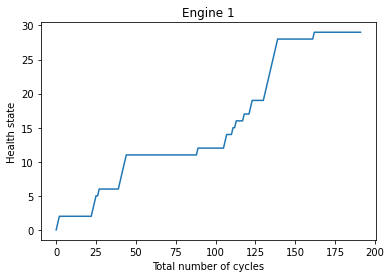

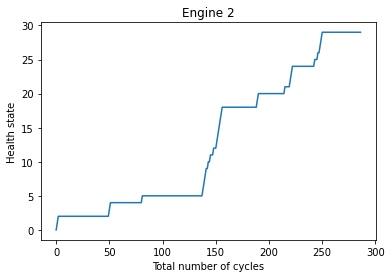

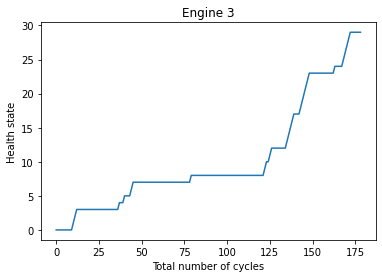

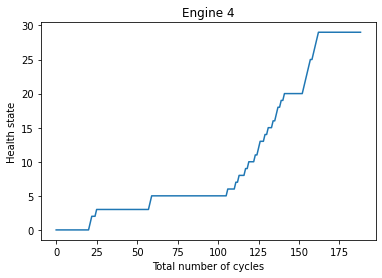

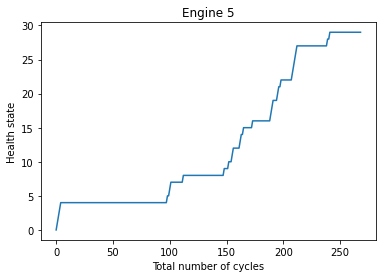

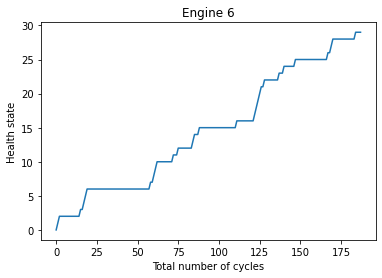

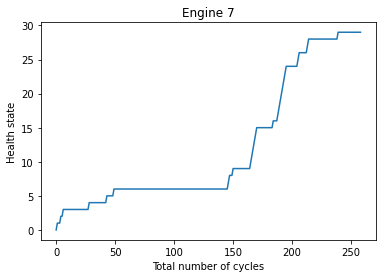

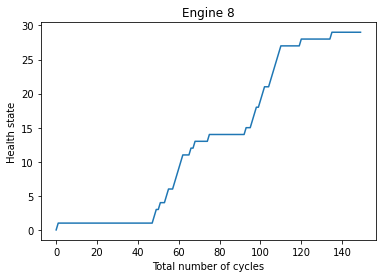

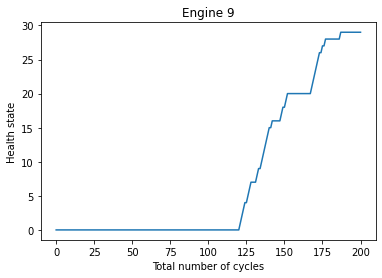

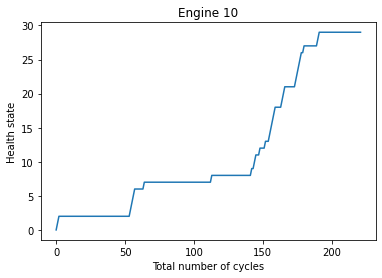

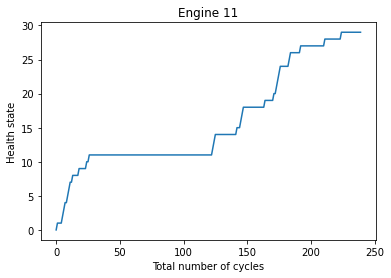

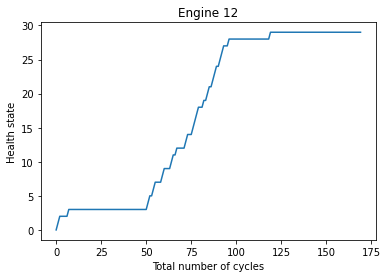

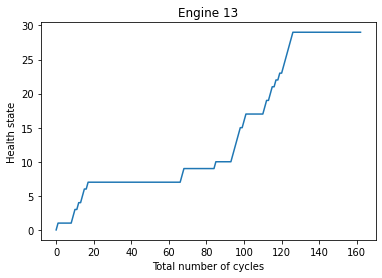

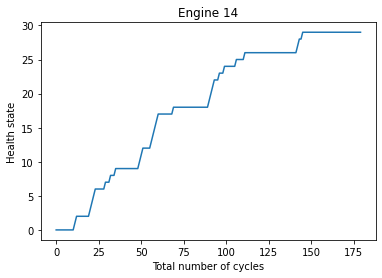

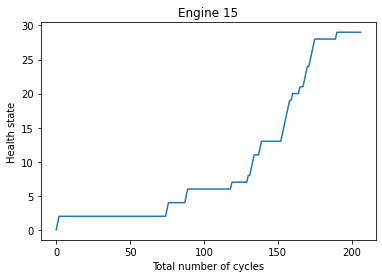

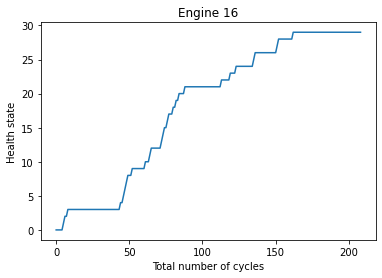

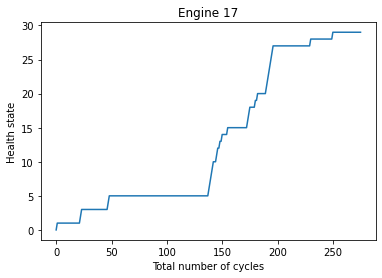

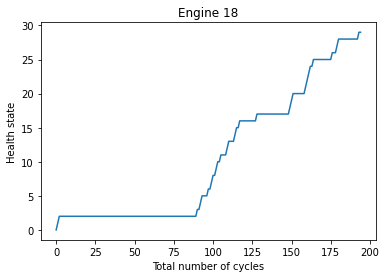

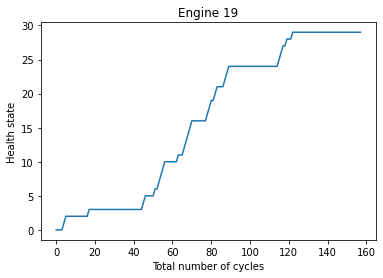

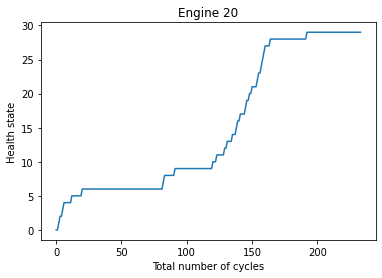

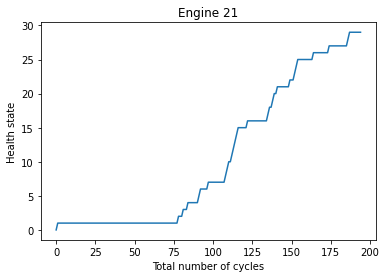

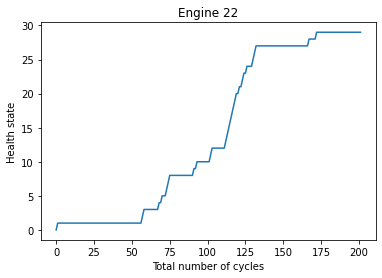

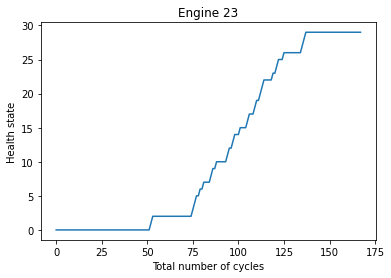

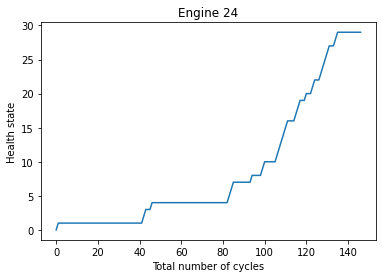

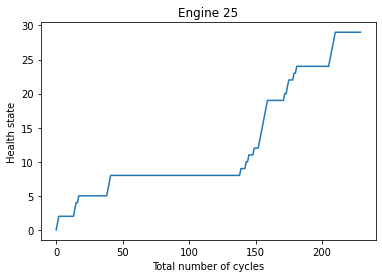

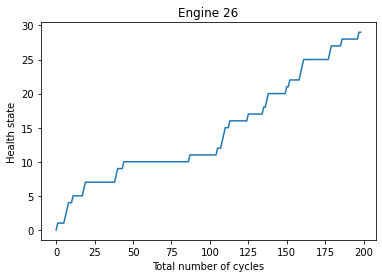

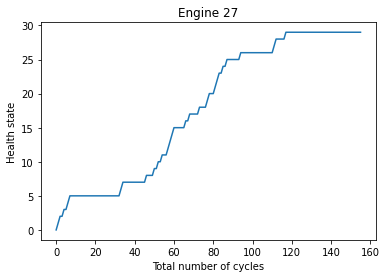

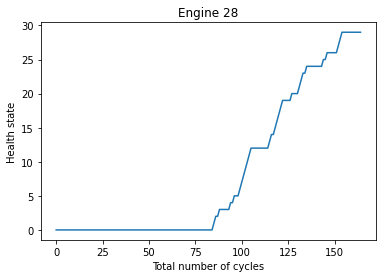

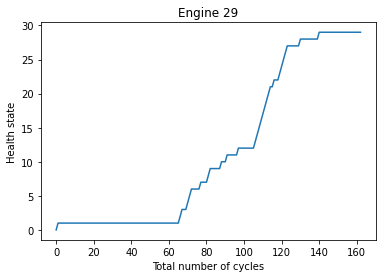

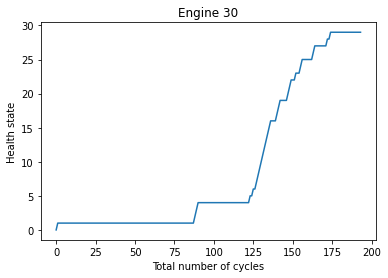

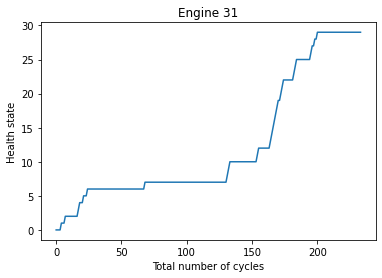

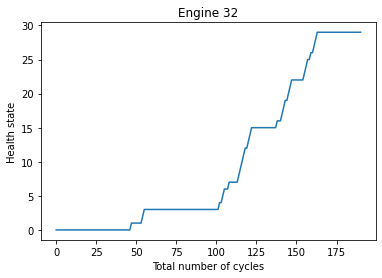

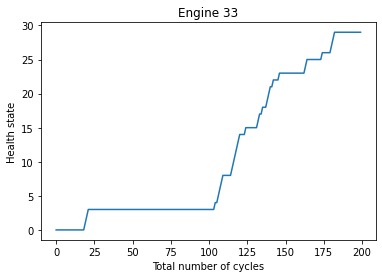

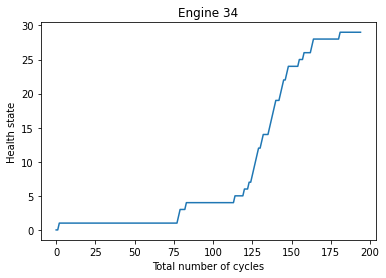

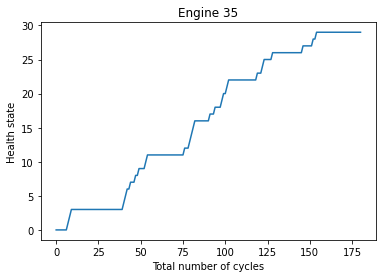

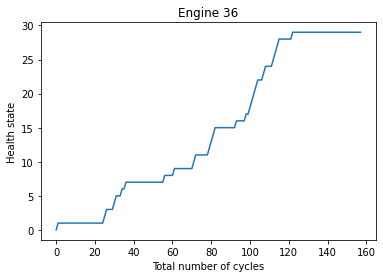

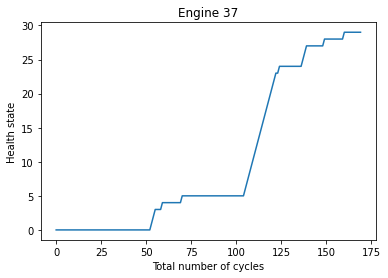

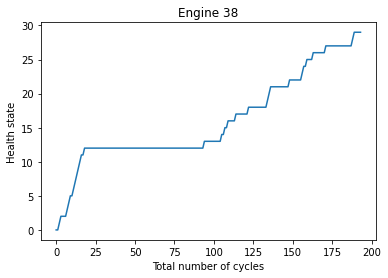

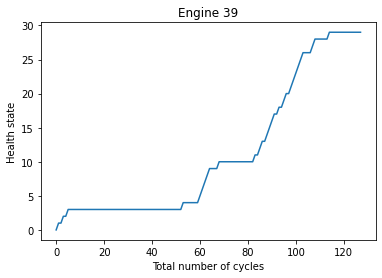

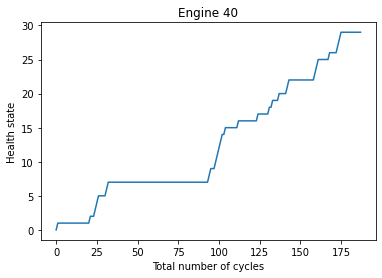

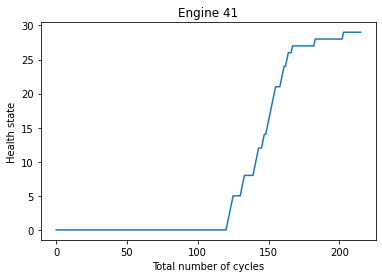

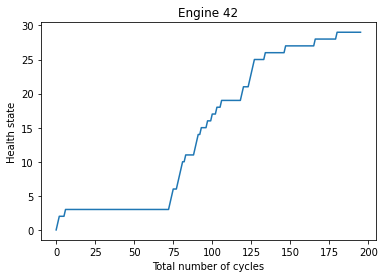

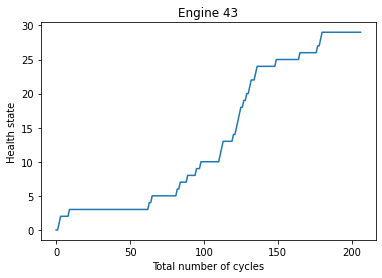

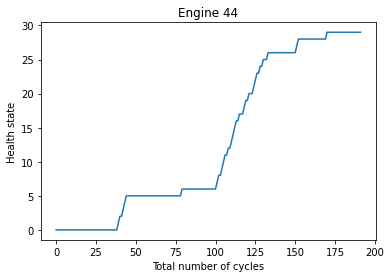

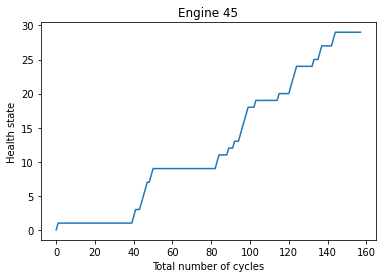

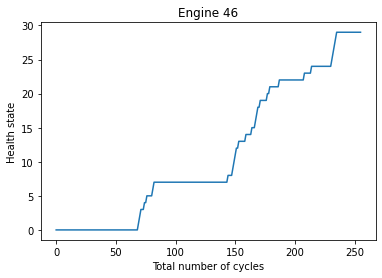

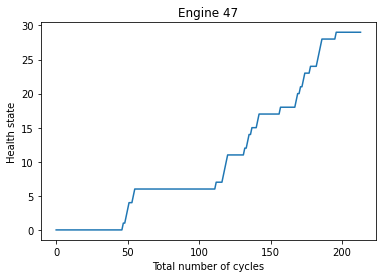

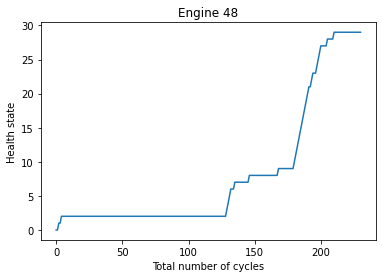

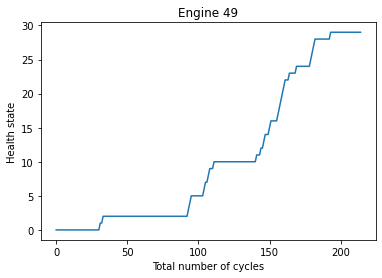

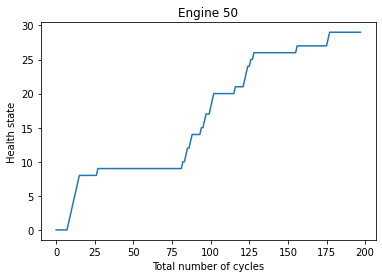

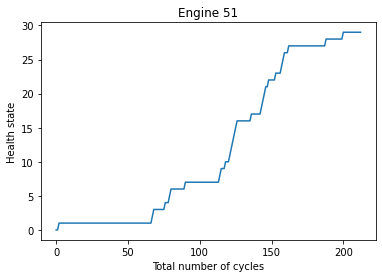

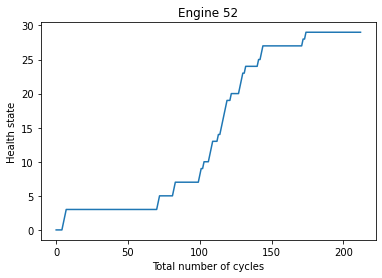

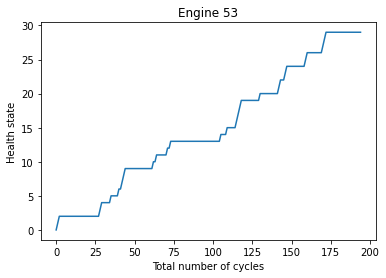

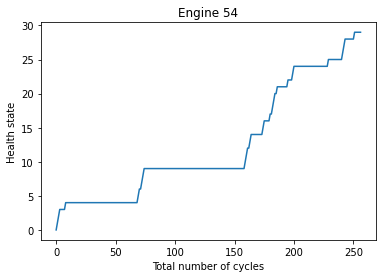

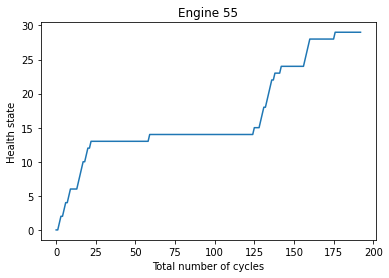

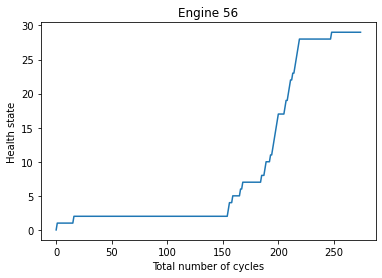

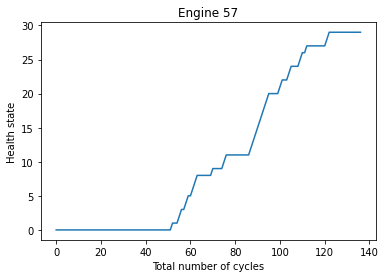

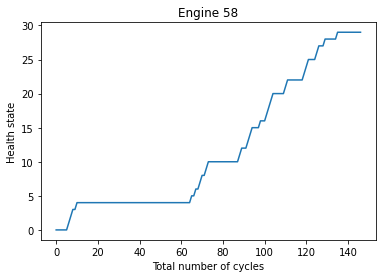

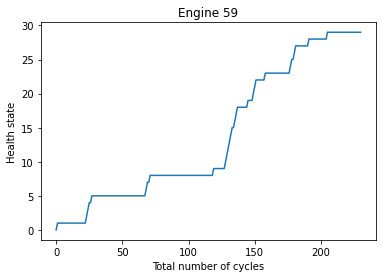

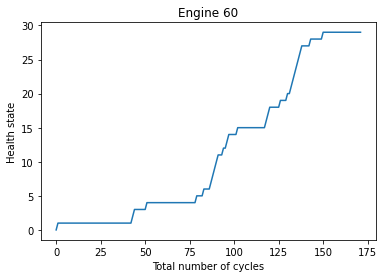

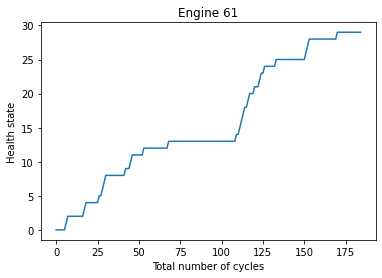

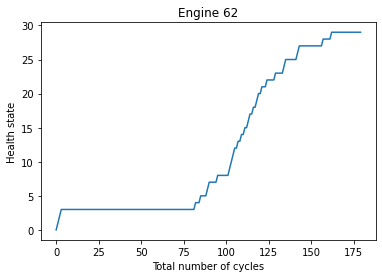

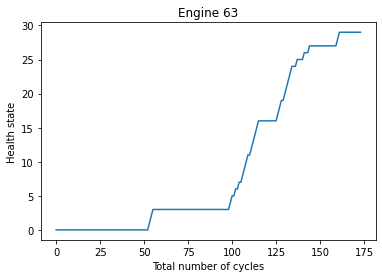

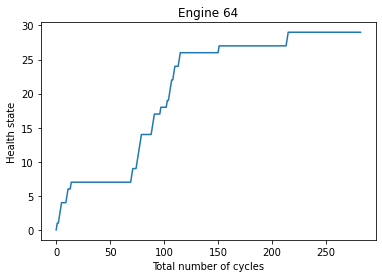

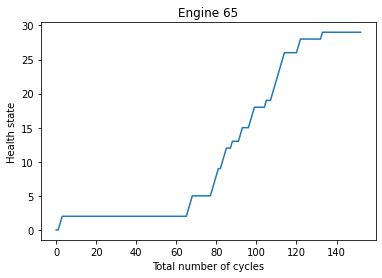

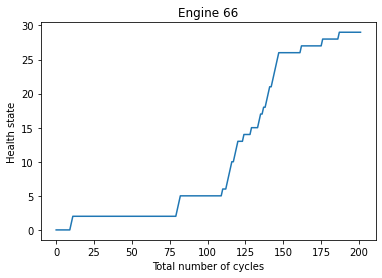

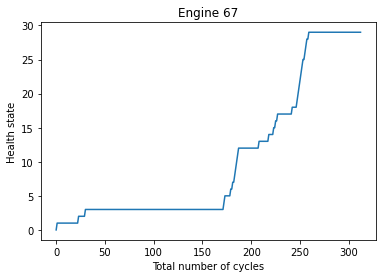

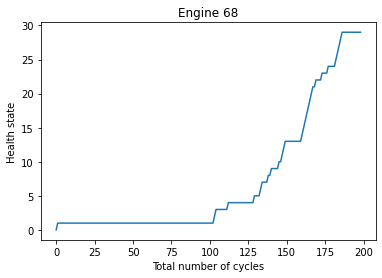

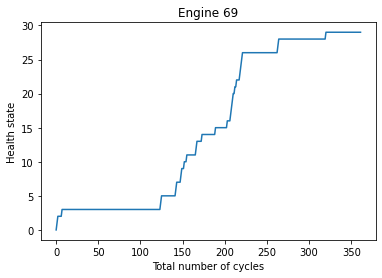

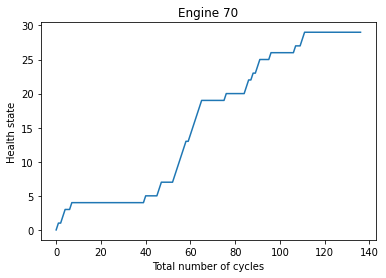

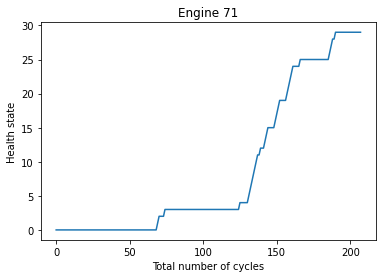

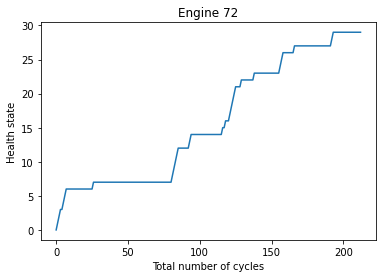

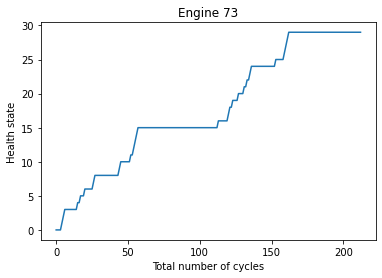

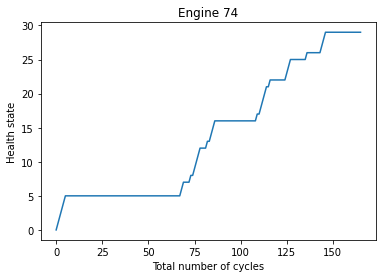

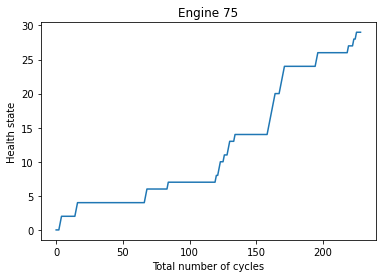

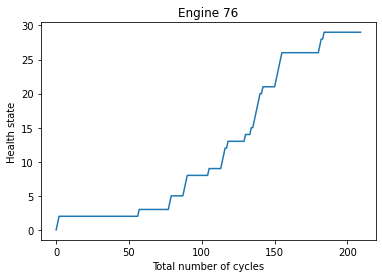

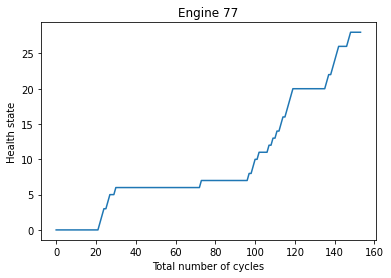

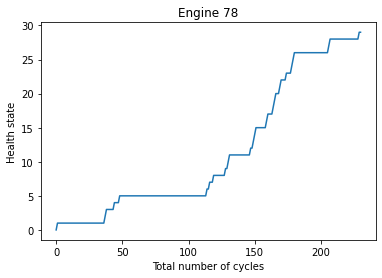

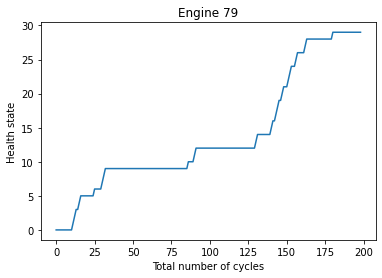

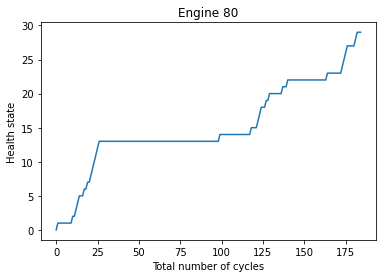

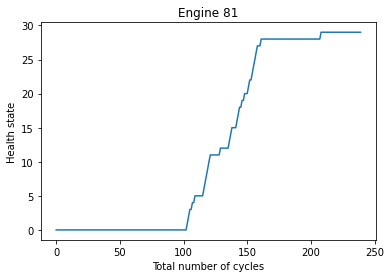

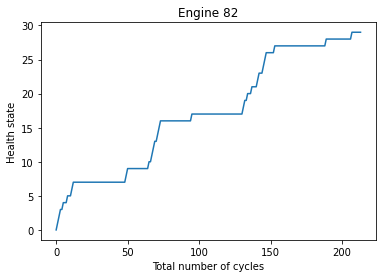

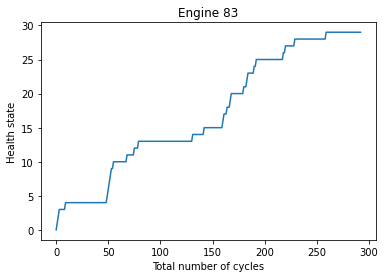

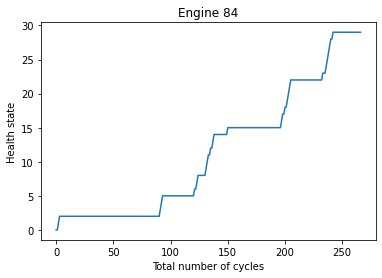

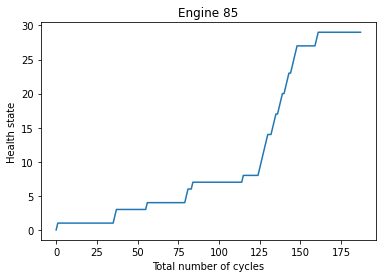

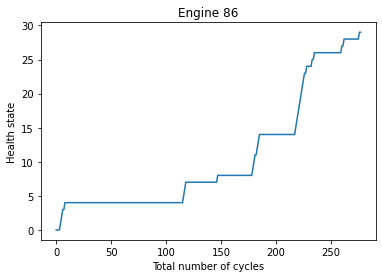

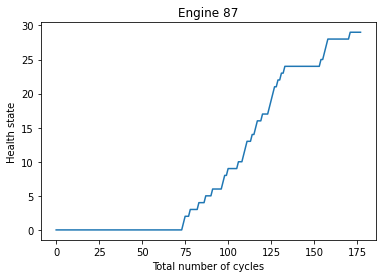

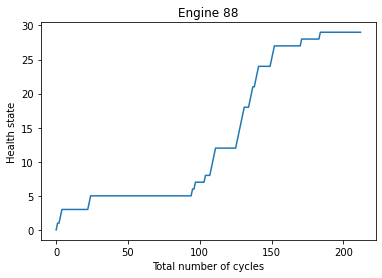

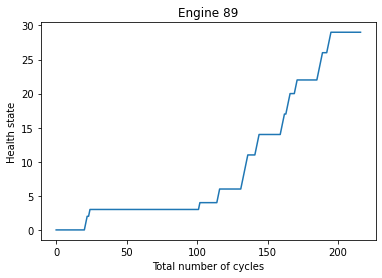

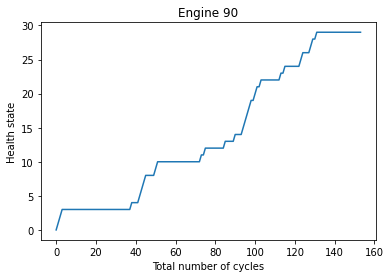

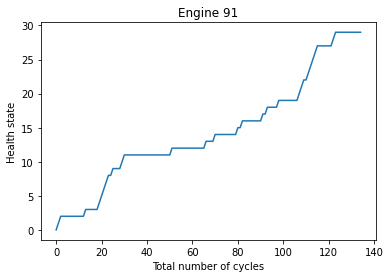

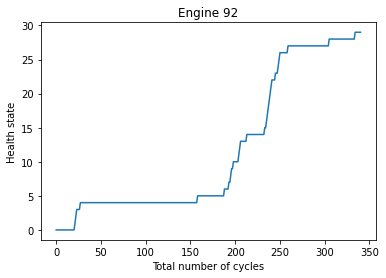

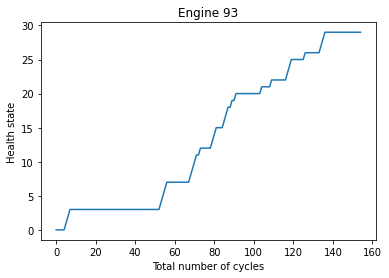

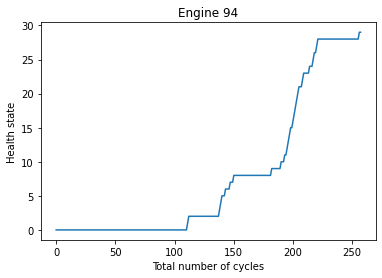

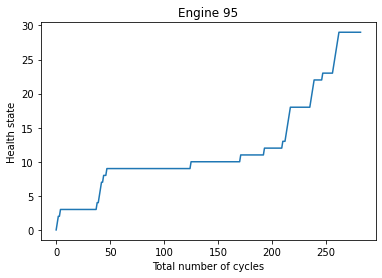

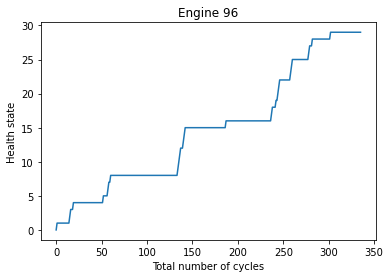

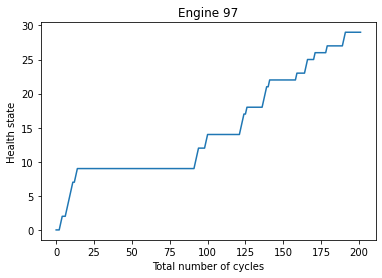

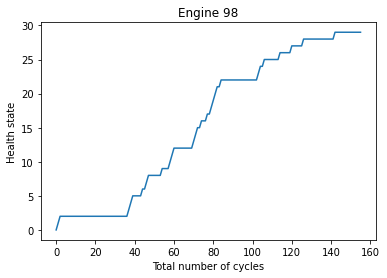

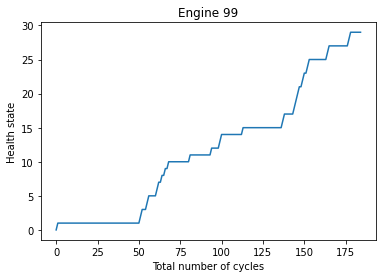

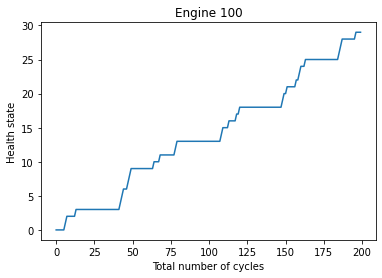

In [35]:
import matplotlib.pyplot as plt
for i in range(0,engines):
  plt.plot(health_state[i])
  plt.xlabel('Total number of cycles')
  plt.ylabel('Health state')
  plt.title(f'Engine %d'%(i+1))
  plt.show()